Exploring Data(using mcdonalds.csv file)

In [50]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
mcdonalds = pd.read_csv('mcdonalds.csv')
print(mcdonalds.columns)
from sklearn.decomposition import PCA


Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [68]:
df = pd.read_csv('mcdonalds.csv')
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
dimensions = mcdonalds.shape
print(dimensions)

(1453, 15)


In [6]:
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [8]:
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
col_means = MD_x.mean().round(2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [82]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,3
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,1
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,1


In [84]:
#Considering only first 11 attributes
MD_x = df.loc[:,cat]
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [86]:
#Considering only the 11 cols and converting it into array
x = df.loc[:,cat].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [88]:
#Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing

MD_pca = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [41]:

# Extract the first 11 columns
MD_x = mcdonalds.iloc[:, 0:11]

# Convert "Yes" to 1 and everything else to 0
MD_x = (MD_x == "Yes").astype(int)

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Summarize the PCA results
explained_variance = pca.explained_variance_ratio_
components = pca.components_
cumulative_variance = np.cumsum(explained_variance)

# Print the summary
print("Explained Variance Ratio:")
print(np.round(explained_variance, 2))
print("\nCumulative Explained Variance Ratio:")
print(np.round(cumulative_variance, 2))
print("\nPCA Components:")
print(np.round(components, 2))


Explained Variance Ratio:
[0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]

Cumulative Explained Variance Ratio:
[0.3  0.49 0.63 0.71 0.77 0.82 0.86 0.9  0.94 0.97 1.  ]

PCA Components:
[[-0.48 -0.16 -0.01  0.12  0.3  -0.11 -0.34 -0.47  0.33 -0.21  0.37]
 [ 0.36  0.02  0.02 -0.03 -0.06 -0.09 -0.61  0.31  0.6   0.08 -0.14]
 [-0.3  -0.06 -0.04 -0.32 -0.8  -0.06 -0.15 -0.29  0.02  0.19 -0.09]
 [ 0.06 -0.14  0.2  -0.35  0.25 -0.1   0.12 -0.    0.07  0.76  0.37]
 [-0.31  0.28  0.07 -0.07  0.36  0.11 -0.13 -0.21 -0.    0.29 -0.73]
 [ 0.17 -0.35 -0.36 -0.41  0.21 -0.59 -0.1  -0.08 -0.26 -0.18 -0.21]
 [-0.28 -0.06  0.71 -0.39  0.04 -0.09 -0.04  0.36 -0.07 -0.35 -0.03]
 [ 0.01 -0.11  0.38  0.59 -0.14 -0.63  0.14 -0.07  0.03  0.18 -0.17]
 [ 0.57 -0.02  0.4  -0.16 -0.    0.17  0.08 -0.64  0.07 -0.19 -0.07]
 [-0.11 -0.67 -0.08 -0.01  0.01  0.24  0.43  0.08  0.45 -0.04 -0.29]
 [ 0.05 -0.54  0.14  0.25  0.    0.34 -0.49  0.02 -0.49  0.16 -0.04]]


Extracting Segments
* Using K Means


C:\Users\posha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\posha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\posha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\posha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

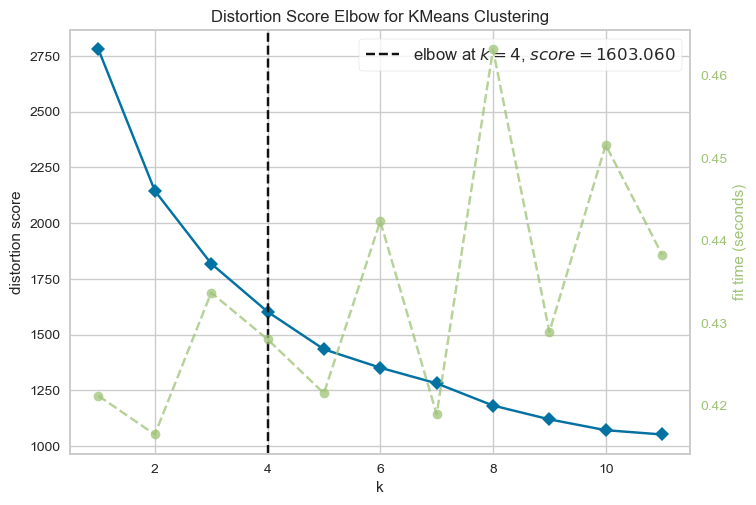

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(MD_x)
visualizer.show()

In [70]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(MD_x)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

C:\Users\posha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\posha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[2 0 0 ... 0 1 3]
1603.0604440558916
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


In [72]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 580, 0: 323, 2: 304, 3: 246})

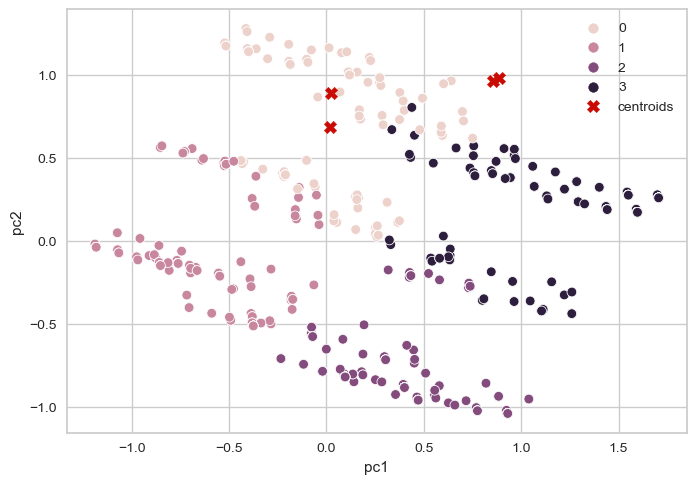

In [90]:
#Visulazing clusters
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

Profiling Segments


In [93]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

In [95]:
D = np.transpose(MD_x)
D = linkage(D, method = "average")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [21.875, 21.875, 74.375, 74.375]],
 'dcoord': [[0.0, 15.132745950421556, 15.132745950421556, 0.0],
  [0.0, 13.820274961085254, 13.820274961085254, 0.0],
  [0.0, 16.837294569763987, 16.837294569763987, 13.820274961085254],
  [0.0, 23.67244402390833, 23.67244402390833, 16.837294569763987],
  [15.132745950421556,
   24.097479054882314,
   24.097479054882314,
   23.67244402390833],
  [0.0, 18.303005217723125, 18.303005217723125, 0.0],
  [0.0, 22.260923119338788, 22.260923119338788, 18.303005217723125],
  [0.0, 23.646302388396077, 23.646302388396077, 22.260923119338788],
  [0.0, 26.301594692930717, 26.301594692930717, 23.646302388396077],
  [24.097479054882314,
   30.24915897946193,
   30.24915897946193,
   26.301594692930717

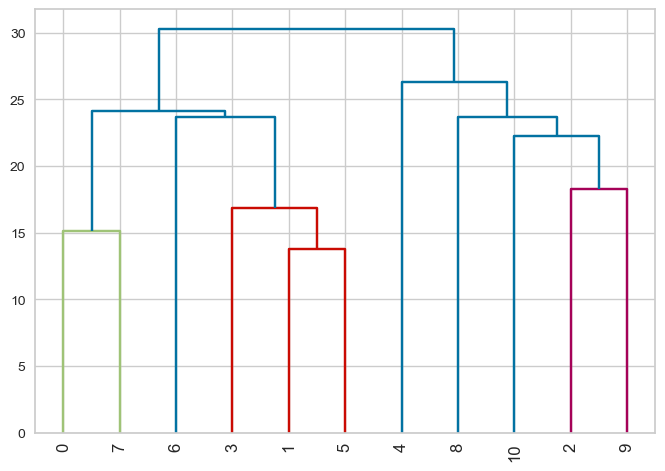

In [97]:
# plot the dendrogram
dendrogram(D, truncate_mode = "lastp", p = 12, leaf_rotation = 90,
           leaf_font_size = 12, show_contracted = True)

Describing Segments

In [100]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab 

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
cluster_num,,,,,,,,,,,
0,42,60,66,47,7,6,7,3,36,5,44
1,65,90,143,111,13,6,2,4,43,4,99
2,31,31,12,2,25,28,34,36,51,54,0
3,14,6,8,0,13,19,30,28,39,89,0


Mosaic Plot

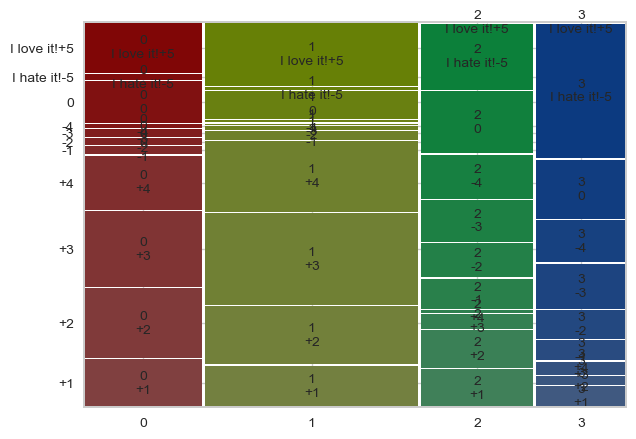

In [102]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

Selecting Target Segments


In [106]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [108]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [110]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [112]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.798762,2.547988
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.569106,6.739837,2.654472


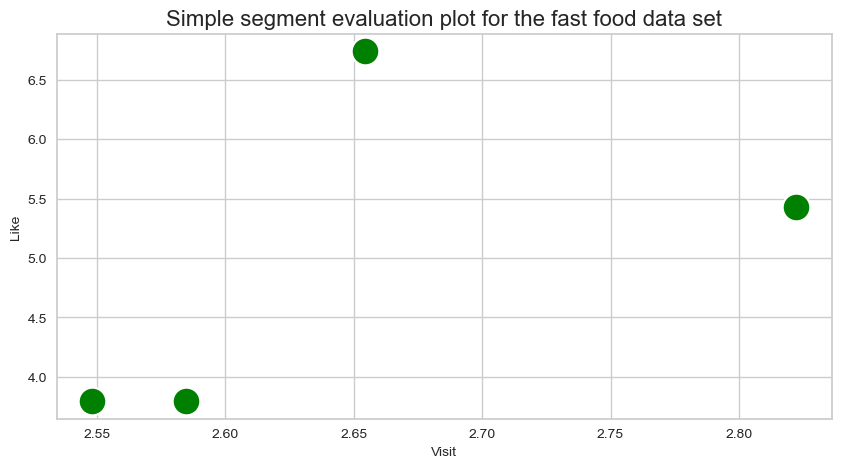

In [114]:
#Target segments

plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="green")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 16) 
plt.xlabel("Visit", fontsize = 10) 
plt.ylabel("Like", fontsize = 10) 
plt.show()

Customising the Marketing Mix


In this step, the marketing mix is designed. McDonald's managers may choose to target segment 3 (young customers who enjoy McDonald's food but find it expensive).

Create an MCSUPERBUDGET line to meet the price expectations of this segment (4Ps: Price). The advantage of this approach is that members of segment 3 may become loyal customers who, as they earn more money, will no longer care about price and switch to regular McDonald's products. 

Evaluation and Monitoring

After completing the market segmentation analysis and marketing activities, it's important to evaluate the success of the strategy and monitor the market on an ongoing basis. Continuous basis. Segment 3 members may earn more money, making the MCSUPERBUDGET line unsuitable for them. Existing market segments may undergo changes. Changes can occur in the larger marketplace, such as when new competitors enter. To adapt to changing market conditions, McDonald's management must monitor all potential sources of change and adjust their marketing strategies accordingly.